In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab.data_table import DataTable
DataTable.max_columns = 40

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet

In [184]:
train_data = pd.read_csv("/content/drive/MyDrive/ml_mai/train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/ml_mai/test.csv")

In [183]:
train_data.head(15)

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2010-06-26,27.0,66829.0,549.0,17290.0,60.0,Divorced,1.0,Rent,1095.0,...,Employed,Associate,4.0,35067.0,0.257790,0.251465,508.970230,0.288013,0.0,66.176500
1,1996-09-23,55.0,172147.0,850.0,16110.0,36.0,Widowed,1.0,Mortgage,211.0,...,Employed,High School,33.0,27001.0,0.086110,0.093173,514.675859,0.050585,1.0,28.495737
2,2015-01-19,51.0,300000.0,850.0,38436.0,36.0,Married,0.0,Mortgage,546.0,...,Employed,Bachelor,28.0,278382.0,0.108436,0.115443,1268.276385,0.072571,1.0,34.488104
3,1981-05-12,25.0,34683.0,847.0,19186.0,48.0,Married,0.0,Other,153.0,...,Employed,High School,0.0,9224.0,0.100686,0.112822,498.505187,0.225415,1.0,36.910753
4,1995-05-07,55.0,300000.0,850.0,30437.0,48.0,Single,2.0,Rent,562.0,...,Employed,Bachelor,31.0,4502.0,0.110437,0.089037,756.035156,0.052721,1.0,31.347091
5,1997-05-12,21.0,15000.0,300.0,29786.0,48.0,Single,4.0,Rent,457.0,...,Self-Employed,High School,0.0,53845.0,0.384786,0.404018,1259.904560,1.373524,0.0,64.365309
6,1987-04-06,32.0,300000.0,850.0,89073.0,36.0,Married,1.0,Rent,82.0,...,Employed,Associate,12.0,12910.0,0.159073,0.150327,3089.170736,0.126847,1.0,38.910949
7,1989-05-09,38.0,191474.0,600.0,6706.0,72.0,Married,0.0,Rent,153.0,...,Employed,High School,13.0,4777.0,0.231706,0.262994,186.024237,0.021247,1.0,39.895288
8,1989-09-03,35.0,15000.0,403.0,16291.0,36.0,Married,1.0,Mortgage,960.0,...,Employed,High School,11.0,979629.0,0.309791,0.279328,673.263227,1.306611,0.0,67.814529
9,1985-02-28,34.0,15000.0,300.0,20884.0,60.0,Married,0.0,Mortgage,869.0,...,Employed,Bachelor,10.0,2896.0,0.385884,0.404932,816.139535,1.348112,0.0,70.062691


In [11]:
test_data.head(15)

,ID,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,...,JobTenure,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved
0,0,1979-01-03,49,207095,850,14458,60,Single,0,Rent,...,6,Employed,High School,23,10626,0.104458,0.125350,325.532336,0.040650,1
1,1,2006-04-10,28,64653,674,65491,48,Single,2,Own,...,3,Employed,High School,3,299024,0.233491,0.260561,2210.247757,0.454410,0
2,2,2013-11-28,41,300000,768,16811,60,Single,1,Own,...,3,Employed,High School,19,6979,0.147811,0.154571,403.977431,0.034919,1
3,3,1995-08-24,50,300000,850,48737,36,Divorced,0,Mortgage,...,3,Self-Employed,Bachelor,26,8438,0.118737,0.099712,1571.946906,0.085558,1
4,4,1980-06-15,35,300000,672,51916,60,Single,6,Mortgage,...,7,Employed,Associate,12,436216,0.230916,0.237727,1486.675235,0.063707,1
5,5,2014-05-29,48,15000,300,7178,36,Single,2,Rent,...,2,Employed,Associate,28,12220,0.352178,0.390184,341.234671,0.705788,0
6,6,2001-05-26,41,265573,850,11772,48,Divorced,0,Rent,...,4,Employed,Associate,17,7349,0.091772,0.092843,294.538186,0.031428,1
7,7,2014-07-14,21,300000,850,32153,48,Single,1,Mortgage,...,3,Unemployed,Bachelor,0,64375,0.112153,0.110142,831.232670,0.044529,1
8,8,1996-09-24,28,52374,850,16261,12,Married,1,Rent,...,5,Employed,Associate,7,552406,0.066261,0.064742,1403.072977,0.459405,1
9,9,2015-08-24,46,73335,487,99804,48,Married,3,Rent,...,8,Employed,High School,28,5082,0.361304,0.372611,4026.972157,0.670235,0


In [12]:
train_data.isna().sum() # выявили наличие пропусков

,0
ApplicationDate,530
Age,530
AnnualIncome,530
CreditScore,1031
LoanAmount,1031
LoanDuration,530
MaritalStatus,530
NumberOfDependents,530
HomeOwnershipStatus,530
MonthlyDebtPayments,1031


In [14]:
train_data.info() # узнали типы данных в колонке для последующей работы с пропусками

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             10487 non-null  object 
 1   Age                         10487 non-null  float64
 2   AnnualIncome                10487 non-null  float64
 3   CreditScore                 9986 non-null   float64
 4   LoanAmount                  9986 non-null   float64
 5   LoanDuration                10487 non-null  float64
 6   MaritalStatus               10487 non-null  object 
 7   NumberOfDependents          10487 non-null  float64
 8   HomeOwnershipStatus         10487 non-null  object 
 9   MonthlyDebtPayments         9986 non-null   float64
 10  CreditCardUtilizationRate   10487 non-null  float64
 11  NumberOfOpenCreditLines     10487 non-null  float64
 12  NumberOfCreditInquiries     10487 non-null  float64
 13  DebtToIncomeRatio           104

In [185]:
train_data = train_data.drop('ApplicationDate', axis = 1) # эта колонка не несет полезной информации и будет мешать в последущей предобработке
train_data

,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,CreditCardUtilizationRate,...,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,27.0,66829.0,549.0,17290.0,60.0,Divorced,1.0,Rent,1095.0,0.151985,...,Employed,Associate,4.0,35067.0,0.257790,0.251465,508.970230,0.288013,0.0,66.176500
1,55.0,172147.0,850.0,16110.0,36.0,Widowed,1.0,Mortgage,211.0,0.175693,...,Employed,High School,33.0,27001.0,0.086110,0.093173,514.675859,0.050585,1.0,28.495737
2,51.0,300000.0,850.0,38436.0,36.0,Married,0.0,Mortgage,546.0,0.444605,...,Employed,Bachelor,28.0,278382.0,0.108436,0.115443,1268.276385,0.072571,1.0,34.488104
3,25.0,34683.0,847.0,19186.0,48.0,Married,0.0,Other,153.0,0.188452,...,Employed,High School,0.0,9224.0,0.100686,0.112822,498.505187,0.225415,1.0,36.910753
4,55.0,300000.0,850.0,30437.0,48.0,Single,2.0,Rent,562.0,0.273431,...,Employed,Bachelor,31.0,4502.0,0.110437,0.089037,756.035156,0.052721,1.0,31.347091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11012,57.0,300000.0,850.0,14756.0,48.0,Married,2.0,Own,620.0,0.477742,...,Employed,Associate,38.0,167544.0,0.094756,0.106387,378.792448,0.039952,1.0,32.440586
11013,28.0,15000.0,300.0,51361.0,96.0,Single,1.0,Own,696.0,0.322554,...,Employed,Bachelor,5.0,116879.0,0.446361,0.401087,1793.042130,1.991234,0.0,67.673170
11014,23.0,15000.0,302.0,30724.0,72.0,Married,3.0,Rent,413.0,0.497062,...,Self-Employed,Associate,0.0,250778.0,0.404724,0.360670,1047.672294,1.168538,0.0,75.292707
11015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [186]:
float_features = train_data.select_dtypes(include=[np.number]).columns.to_list() # замена NaN на медиану в числовых признаках
float_features.remove('RiskScore')
for col in float_features:
    train_data[col].fillna(train_data[col].median(), inplace=True)
    test_data[col].fillna(test_data[col].median(), inplace=True)
train_data['RiskScore'].fillna(train_data[col].median(), inplace=True)

<ipython-input-186-318d0d108cbf>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[col].fillna(train_data[col].median(), inplace=True)
<ipython-input-186-318d0d108cbf>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [187]:
categorical_features = train_data.select_dtypes(include=[object]).columns.to_list() # замена NaN на 'Unknown' в категориальных признаках
for col in categorical_features:
    train_data[col].fillna('Unknown', inplace=True)
    test_data[col].fillna('Unknown', inplace=True)

<ipython-input-187-0c3aab8bc7ae>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[col].fillna('Unknown', inplace=True)
<ipython-input-187-0c3aab8bc7ae>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [188]:
label_encoder = LabelEncoder() # преобразование категориальных признаков
for col in categorical_features:
    train_data[col] = label_encoder.fit_transform(train_data[col])
    test_data[col] = label_encoder.transform(test_data[col])

In [59]:
train_data.isna().sum()

,0
Age,0
AnnualIncome,0
CreditScore,0
LoanAmount,0
LoanDuration,0
MaritalStatus,0
NumberOfDependents,0
HomeOwnershipStatus,0
MonthlyDebtPayments,0
CreditCardUtilizationRate,0


In [60]:
train_data.describe()

,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,CreditCardUtilizationRate,...,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,...,11017.000000,11017.000000,11017.000000,1.101700e+04,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,1.101700e+04
mean,39.857584,129539.798947,682.239403,29121.278706,53.178179,1.399746,1.540982,1.538259,532.565490,0.283331,...,0.313515,2.011618,17.598076,1.423710e+05,0.198673,0.199178,1056.824726,0.501250,0.535264,-2.446243e+04
std,11.331345,113338.900942,167.293860,26481.062533,23.925423,0.962511,1.389469,1.367021,479.866528,0.155435,...,0.763591,1.455666,11.061976,4.416089e+05,0.090022,0.094200,1313.985654,0.875867,0.498778,1.396821e+06
min,18.000000,15000.000000,300.000000,1063.000000,12.000000,0.000000,0.000000,0.000000,13.000000,0.003674,...,0.000000,0.000000,0.000000,1.004000e+03,0.052494,0.046445,30.008506,0.006064,0.000000,-9.999999e+06
25%,32.000000,23712.000000,571.000000,13611.000000,36.000000,1.000000,0.000000,0.000000,248.000000,0.164019,...,0.000000,1.000000,9.000000,7.893000e+03,0.125079,0.121904,387.986235,0.069591,0.000000,3.147369e+01
50%,40.000000,89015.000000,722.500000,21828.500000,48.000000,1.000000,1.000000,2.000000,398.000000,0.262229,...,0.000000,3.000000,17.000000,2.742950e+04,0.182023,0.180710,684.878529,0.178193,1.000000,4.220860e+01
75%,47.000000,241910.000000,850.000000,34854.000000,60.000000,2.000000,2.000000,3.000000,638.000000,0.384101,...,0.000000,3.000000,25.000000,1.060430e+05,0.254760,0.260614,1227.394280,0.596358,1.000000,6.468024e+01
max,80.000000,748508.000000,850.000000,418997.000000,120.000000,4.000000,6.000000,4.000000,10879.000000,0.914635,...,3.000000,5.000000,57.000000,1.126117e+07,0.722497,0.833647,29634.807816,24.383046,1.000000,1.000000e+07


Среднее значение и стандартные отклонения по колонкам отличаются. Следовательно, требуется нормализация.

In [189]:
scaler = StandardScaler()
train_data[float_features] = scaler.fit_transform(train_data[float_features])
test_data[float_features] = scaler.transform(test_data[float_features])

In [190]:
train_data.describe()

,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,CreditCardUtilizationRate,...,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,1.101700e+04,1.101700e+04,1.101700e+04,1.101700e+04,1.101700e+04,11017.000000,1.101700e+04,11017.000000,1.101700e+04,1.101700e+04,...,11017.000000,11017.000000,1.101700e+04,1.101700e+04,1.101700e+04,1.101700e+04,1.101700e+04,1.101700e+04,1.101700e+04,1.101700e+04
mean,1.128665e-16,-5.933551e-17,8.061890e-17,7.739414e-17,1.109316e-16,1.399746,1.547883e-17,1.538259,1.547883e-17,-3.160261e-17,...,0.313515,2.011618,4.643649e-17,2.579805e-17,5.159610e-18,9.222802e-17,-2.063844e-17,8.126385e-17,1.547883e-17,-2.446243e+04
std,1.000045e+00,1.000045e+00,1.000045e+00,1.000045e+00,1.000045e+00,0.962511,1.000045e+00,1.367021,1.000045e+00,1.000045e+00,...,0.763591,1.455666,1.000045e+00,1.000045e+00,1.000045e+00,1.000045e+00,1.000045e+00,1.000045e+00,1.000045e+00,1.396821e+06
min,-1.929036e+00,-1.010642e+00,-2.284942e+00,-1.059608e+00,-1.721184e+00,0.000000,-1.109094e+00,0.000000,-1.082778e+00,-1.799274e+00,...,0.000000,0.000000,-1.590934e+00,-3.201327e-01,-1.623891e+00,-1.621439e+00,-7.814871e-01,-5.653922e-01,-1.073200e+00,-9.999999e+06
25%,-6.934693e-01,-9.337712e-01,-6.649643e-01,-5.857387e-01,-7.180211e-01,1.000000,-1.109094e+00,0.000000,-5.930366e-01,-7.676377e-01,...,0.000000,1.000000,-7.772993e-01,-3.045322e-01,-8.175510e-01,-8.203601e-01,-5.090382e-01,-4.928585e-01,-1.073200e+00,3.147369e+01
50%,1.256892e-02,-3.575704e-01,2.406689e-01,-2.754085e-01,-2.164398e-01,1.000000,-3.893623e-01,2.000000,-2.804355e-01,-1.357655e-01,...,0.000000,3.000000,-5.406836e-02,-2.602908e-01,-1.849706e-01,-1.960579e-01,-2.830800e-01,-3.688594e-01,9.317929e-01,4.220860e+01
75%,6.303524e-01,9.914981e-01,1.002835e+00,2.164936e-01,2.851415e-01,2.000000,3.303700e-01,3.000000,2.197263e-01,6.483386e-01,...,0.000000,3.000000,6.691626e-01,-8.226666e-02,6.230638e-01,6.522152e-01,1.298167e-01,1.085917e-01,9.317929e-01,6.468024e+01
max,3.542760e+00,5.461464e+00,1.002835e+00,1.472348e+01,2.793048e+00,4.000000,3.209299e+00,4.000000,2.156205e+01,4.061713e+00,...,3.000000,5.000000,3.562086e+00,2.517907e+01,5.819113e+00,6.735616e+00,2.175007e+01,2.726770e+01,9.317929e-01,1.000000e+07


In [66]:
X = train_data
Y = train_data['RiskScore']
X_test = test_data.drop('ApplicationDate', axis=1)
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.2, random_state=67)

In [67]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [68]:
Y_pred = model.predict(X_valid)

In [69]:
RMSE = np.sqrt(mean_squared_error(Y_valid, Y_pred))
R2 = r2_score(Y_valid, Y_pred)

In [79]:
print(f"RMSE : {RMSE}")
print(f"R² : {R2}")

RMSE : 7.852971216854433e-10
R² : 1.0


In [80]:
MAE = mean_absolute_error(Y_valid, Y_pred)
print(f"MAE : {MAE}")

MAE : 1.1123877685235094e-08


Похоже, модель переобучилась. Будем пробовать Elastic Net.

In [76]:
model = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
model.fit(X_train, Y_train)

ElasticNet(alpha=0.1, random_state=42)

In [77]:
Y_pred = model.predict(X_valid)

In [81]:
MAE = mean_absolute_error(Y_valid, Y_pred)
RSME = np.sqrt(mean_squared_error(Y_valid, Y_pred))
R2 = r2_score(Y_valid, Y_pred)

print(f"MAE : {MAE}")
print(f"RMSE : {RMSE}")
print(f"R² : {R2}")

MAE : 1.1123877685235094e-08
RMSE : 7.852971216854433e-10
R² : 1.0


Это не сработало. Надо еще раз посмотреть данные.

<ipython-input-82-08f7fa38ba7e>:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


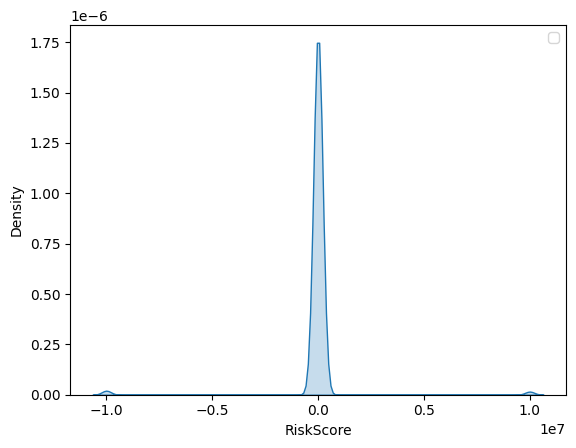

In [82]:
sns.kdeplot(train_data['RiskScore'], fill=True)
plt.legend()
plt.show()

Убираем выбросы в RiskScore.

<Axes: xlabel='RiskScore', ylabel='Density'>

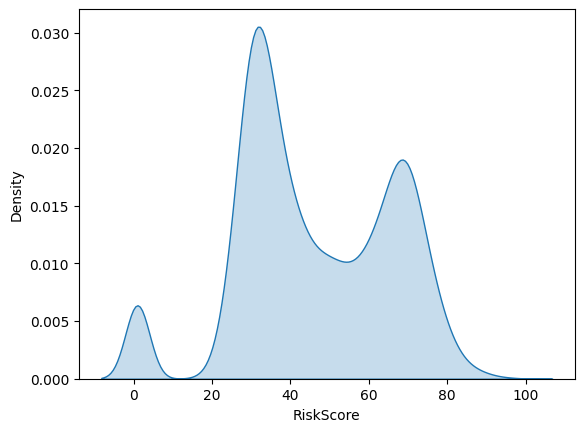

In [191]:
train_data = train_data.loc[abs(train_data['RiskScore']) < 1000000]
sns.kdeplot(train_data['RiskScore'], fill=True)

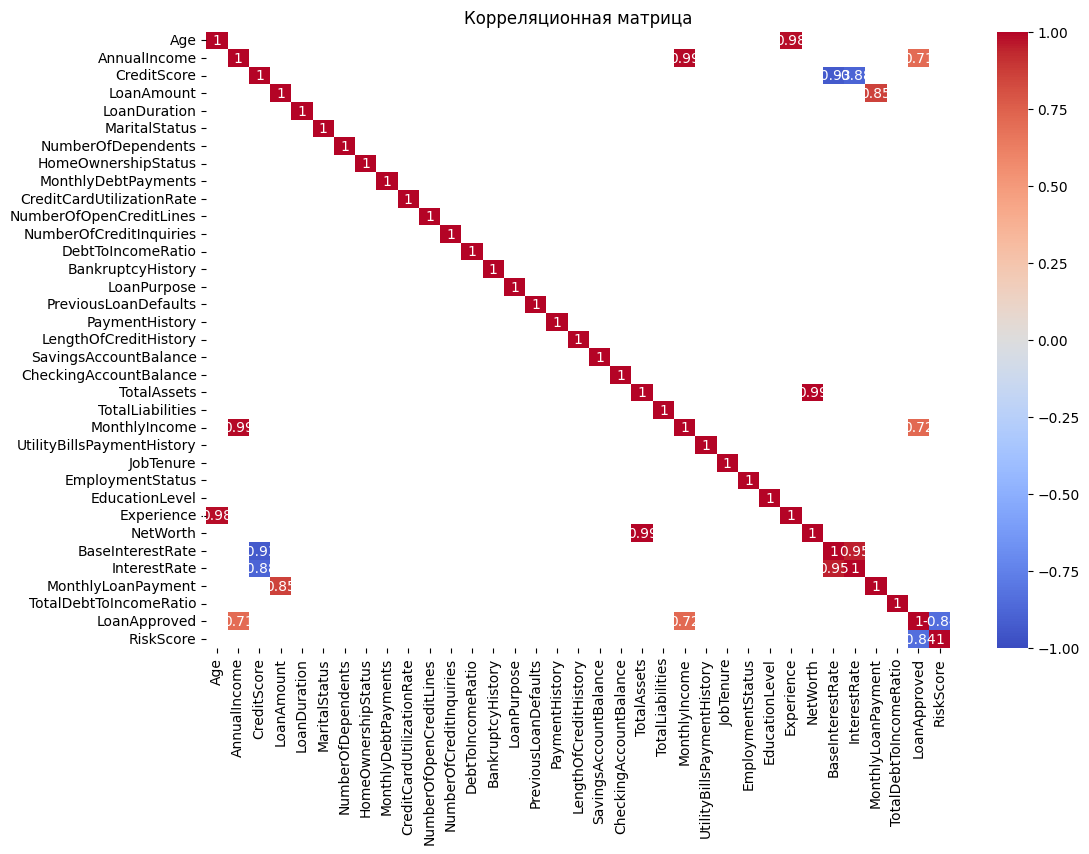

In [162]:
corr_matrix = train_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix[corr_matrix.abs() >= 0.7], annot=True,  cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Корреляционная матрица")
plt.show()

Признаков очень много, и часть из них коррелирует.

In [192]:
train_data["LoanToIncomeRatio"] = train_data["LoanAmount"] / train_data["AnnualIncome"]
test_data["LoanToIncomeRatio"] = test_data["LoanAmount"] / test_data["AnnualIncome"]

train_data["DebtCoverageRatio"] = train_data["MonthlyIncome"] / (train_data["MonthlyDebtPayments"] + 1)
test_data["DebtCoverageRatio"] = test_data["MonthlyIncome"] / (test_data["MonthlyDebtPayments"] + 1)

<ipython-input-192-b68440754440>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["LoanToIncomeRatio"] = train_data["LoanAmount"] / train_data["AnnualIncome"]
<ipython-input-192-b68440754440>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["DebtCoverageRatio"] = train_data["MonthlyIncome"] / (train_data["MonthlyDebtPayments"] + 1)


Пробуем обучить еще раз.

In [200]:
X = train_data.drop(columns=["RiskScore","LoanApproved", "AnnualIncome", "MonthlyIncome", "MonthlyDebtPayments", "NetWorth", "Experience","InterestRate", "BaseInterestRate"])
Y = train_data['RiskScore']
X_test = test_data.drop('ApplicationDate', axis=1)
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.2, random_state=67)

In [201]:
model = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
model.fit(X_train, Y_train)

ElasticNet(alpha=0.1, random_state=42)

In [202]:
Y_pred = model.predict(X_valid)

In [203]:
MAE = mean_absolute_error(Y_valid, Y_pred)
RSME = np.sqrt(mean_squared_error(Y_valid, Y_pred))
R2 = r2_score(Y_valid, Y_pred)

print(f"MAE : {MAE}")
print(f"RMSE : {RMSE}")
print(f"R² : {R2}")

MAE : 8.927633892001587
RMSE : 7.852971216854433e-10
R² : 0.7059603643437965


In [204]:
test_preds = model.predict(test_data.drop(columns=["ID","ApplicationDate","LoanApproved", "AnnualIncome", "MonthlyIncome", "MonthlyDebtPayments", "NetWorth", "Experience","InterestRate", "BaseInterestRate"]))


In [205]:
submission = pd.DataFrame({
    "ID": test_data.columns[0],
    "RiskScore": test_preds
})
submission.to_csv("submission.csv", index=False)